# I.I Imports

In [3]:
import pandas as pd
print("pandas version: " + pd.__version__)
import numpy as np
print("numpy version: "+ np.__version__)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from IPython.display import display, Markdown

from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import svm
from pathlib import Path
from typing import Optional, Dict, List

import scipy.cluster.hierarchy as hac

%matplotlib inline
%config IPCompleter.greedy=True
warnings.filterwarnings('ignore')

pandas version: 2.3.3
numpy version: 1.26.4


In [4]:
%%capture
!pip install -U scikit-learn==1.4.2 imbalanced-learn==0.12.3

# I.II Data Audit and Cleaning

In [5]:
Path().mkdir(exist_ok=True, parents=True)

In [6]:
Path.cwd()

PosixPath('/Users/berkcalisir/School&Career/school-docs/Challenge@Stellantis/Challenge-Stellantis---CarGuardians/src')

When loading we replace "na" with null values.

In [7]:
train = pd.read_csv('./dataset/aps_failure_training_set.csv', na_values='na')
test  = pd.read_csv('./dataset/aps_failure_test_set.csv',    na_values='na')

In [8]:
train.describe()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,6.000000e+04,13671.000000,5.666500e+04,4.513900e+04,57500.000000,57500.000000,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,...,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,57276.000000,57277.000000
mean,5.933650e+04,0.713189,3.560143e+08,1.906206e+05,6.819130,11.006817,2.216364e+02,9.757223e+02,8.606015e+03,8.859128e+04,...,4.454897e+05,2.111264e+05,4.457343e+05,3.939462e+05,3.330582e+05,3.462714e+05,1.387300e+05,8.388915e+03,0.090579,0.212756
std,1.454301e+05,3.478962,7.948749e+08,4.040441e+07,161.543373,209.792592,2.047846e+04,3.420053e+04,1.503220e+05,7.617312e+05,...,1.155540e+06,5.433188e+05,1.168314e+06,1.121044e+06,1.069160e+06,1.728056e+06,4.495100e+05,4.747043e+04,4.368855,8.830641
min,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,8.340000e+02,0.000000,1.600000e+01,2.400000e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.936000e+03,1.166000e+03,2.700000e+03,3.584000e+03,5.120000e+02,1.100000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,3.077600e+04,0.000000,1.520000e+02,1.260000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.337960e+05,1.120860e+05,2.215180e+05,1.899880e+05,9.243200e+04,4.109800e+04,3.812000e+03,0.000000e+00,0.000000,0.000000
75%,4.866800e+04,0.000000,9.640000e+02,4.300000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.383960e+05,2.182320e+05,4.666140e+05,4.032220e+05,2.750940e+05,1.678140e+05,1.397240e+05,2.028000e+03,0.000000,0.000000
max,2.746564e+06,204.000000,2.130707e+09,8.584298e+09,21050.000000,20070.000000,3.376892e+06,4.109372e+06,1.055286e+07,6.340207e+07,...,7.793393e+07,3.775839e+07,9.715238e+07,5.743524e+07,3.160781e+07,1.195801e+08,1.926740e+07,3.810078e+06,482.000000,1146.000000


In [9]:
train.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [10]:
def shape(df,df_name):
    print(f'STATUS: Dimension of "{df_name}" = {df.shape}')

def inspect_duplications(df):
    num_duplicated = len(df[df.duplicated()])
    print(f'STATUS: There are/is {num_duplicated} duplicated rows')
def inspect_null_columns(df, df_name, target=None):
    if df.isnull().values.any() ==False:
        print(f'STATUS: There is NO ANY null value in dataframe "{df_name}"')
    else:
        if target!=None:
            if (df[target].isna().any()):
                print("STATUS: The target class has null values.")
            else:
                print("STATUS: The target class has no null values.")
        columns = df.columns[df.isna().any()].tolist()
        temp = {}
        for column in columns:
            temp[column] = (len(df) - df[column].count())
        print(f"STATUS: {len(columns)} columns with null values, over a total of {len(df.columns)}")
        return pd.DataFrame(temp, index=[0]).T #temp

# replace na to np.na in case it hasn't been replaced earlier while loading the data
train.replace("na", np.nan, inplace=True)
shape(train, 'df')
nulls = inspect_null_columns(train,'train','class')
inspect_duplications(train)
train.head()

STATUS: Dimension of "df" = (60000, 171)
STATUS: The target class has no null values.
STATUS: 169 columns with null values, over a total of 171
STATUS: There are/is 0 duplicated rows


,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [11]:
# summarize missing ratio visually (heatmap or null % histogram).
nulls_df = nulls.rename(columns = {0:'null values per column'}).sort_values(by = 'null values per column', ascending=False)
nulls_df['percentage of nulls'] = (nulls_df['null values per column'])/len(train)
display(nulls_df)

,null values per column,percentage of nulls
br_000,49264,0.821067
bq_000,48722,0.812033
bp_000,47740,0.795667
bo_000,46333,0.772217
ab_000,46329,0.772150
...,...,...
by_000,473,0.007883
ci_000,338,0.005633
cj_000,338,0.005633
ck_000,338,0.005633


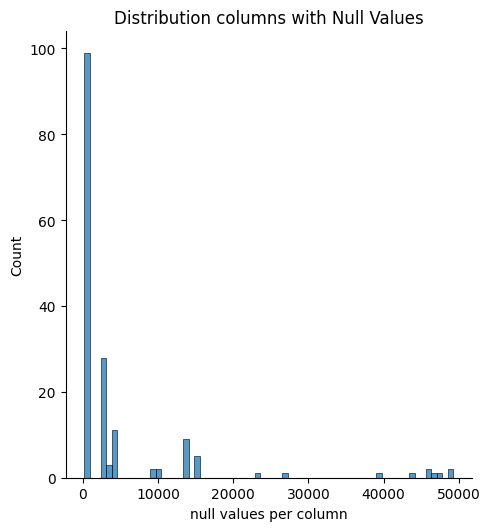

In [12]:
def vis_dist(df, col, lim=False, max_range=None):
    variable = df[col].values
    ax = sns.displot(variable)
    plt.title(f'Distribution columns with Null Values')
    plt.xlabel(f'{col}')
    if lim:
        plt.xlim(0, max_range)
    return plt.show()
vis_dist(nulls_df, 'null values per column')

In [13]:
print("Drop Nulls Columns with over 70%")
to_drop = nulls_df[nulls_df['percentage of nulls']>0.70]
display(to_drop)

Drop Nulls Columns with over 70%


,null values per column,percentage of nulls
br_000,49264,0.821067
bq_000,48722,0.812033
bp_000,47740,0.795667
bo_000,46333,0.772217
ab_000,46329,0.772150
cr_000,46329,0.772150
bn_000,44009,0.733483


We end up removing 7 columns

In [14]:
to_drop.index

Index(['br_000', 'bq_000', 'bp_000', 'bo_000', 'ab_000', 'cr_000', 'bn_000'], dtype='object')

In [15]:
df = train.drop(columns=to_drop.index)

In [16]:
X = df.drop(columns=['class'])
Y = (df['class'] == 'pos').astype(int)

In [17]:
X = X.apply(pd.to_numeric, errors='coerce')

In [18]:
from tqdm import tqdm

float_cols = []
object_cols = []
int_cols = []
for col in tqdm(X.columns):
    try:
        X[col] = pd.to_numeric(X[col])
        if (X[col] % 1 > 0).any():
            # it is float
            float_cols.append(col)
        else:
            int_cols.append(col)
    except:
        object_cols.append(col)
             
print("Continuous Variables")
display(X[float_cols])

print("Discrete Variables")
display(X[int_cols])

if len(object_cols)>1:
    display(X[object_cols])

100%|██████████| 163/163 [00:00<00:00, 726.04it/s]

Continuous Variables


,bt_000,ci_000,cj_000,ck_000,ec_00
0,76698.08,5245752.00,0.00,916567.68,2445.80
1,33057.51,2291079.36,0.00,643536.96,2211.76
2,41040.08,2322692.16,0.00,236099.52,1018.64
3,12.69,2135.04,0.00,4525.44,1.08
4,60874.03,3565684.80,0.00,379111.68,1116.06
...,...,...,...,...,...
59995,153001.45,8289544.32,0.00,1529548.80,2912.04
59996,2285.92,123344.64,0.00,11387.52,80.40
59997,112.49,7518.72,4221.12,10493.76,2.76
59998,80292.76,4776505.92,106006.08,1048805.76,1659.70


Discrete Variables


,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,37250.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,33058,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,18254.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,41040,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,1648.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,12,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,318.0,2212.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,60874,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,0.0,43752.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,153002,6.640000e+02,186.0,0.0,0.0,0.0,0.0,0.0,2564.0,59100.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
59996,2286,2.130707e+09,224.0,0.0,0.0,0.0,0.0,0.0,0.0,104.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
59997,112,2.130706e+09,18.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
59998,80292,2.130706e+09,494.0,0.0,0.0,0.0,0.0,0.0,0.0,330.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


bt_000     6.118994
ci_000     5.836332
cj_000    22.106177
ck_000     8.780391
ec_00      9.785268
dtype: float64


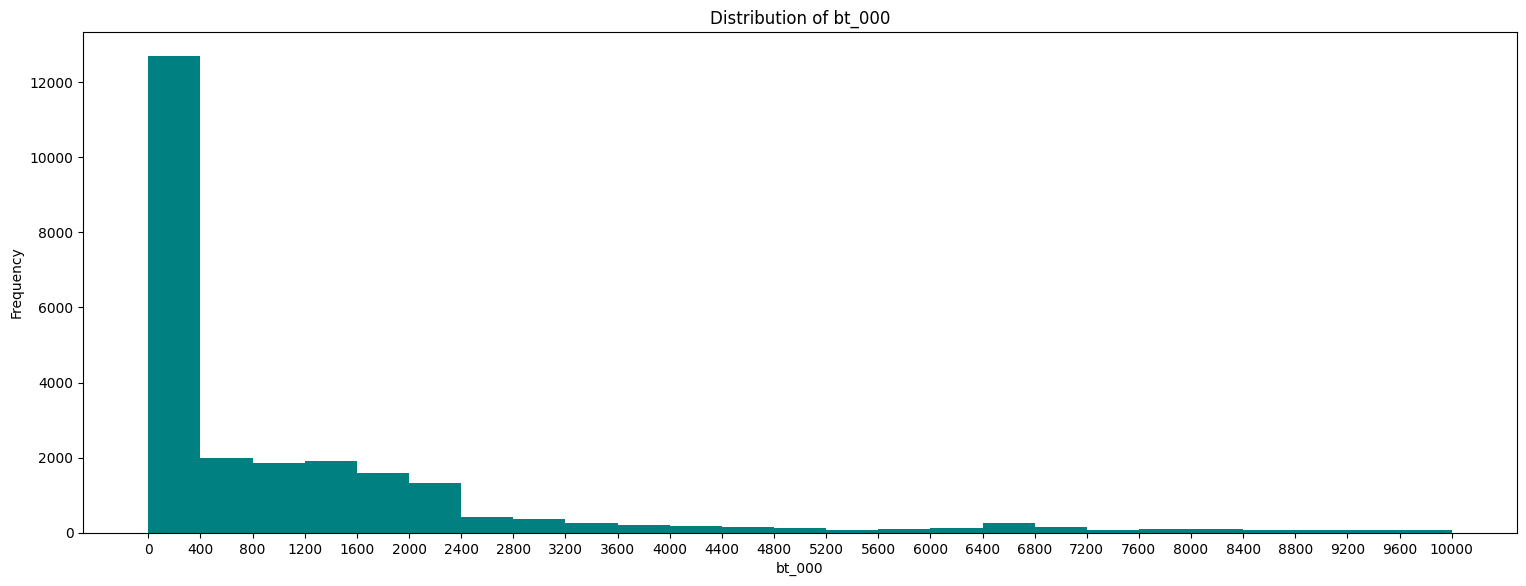

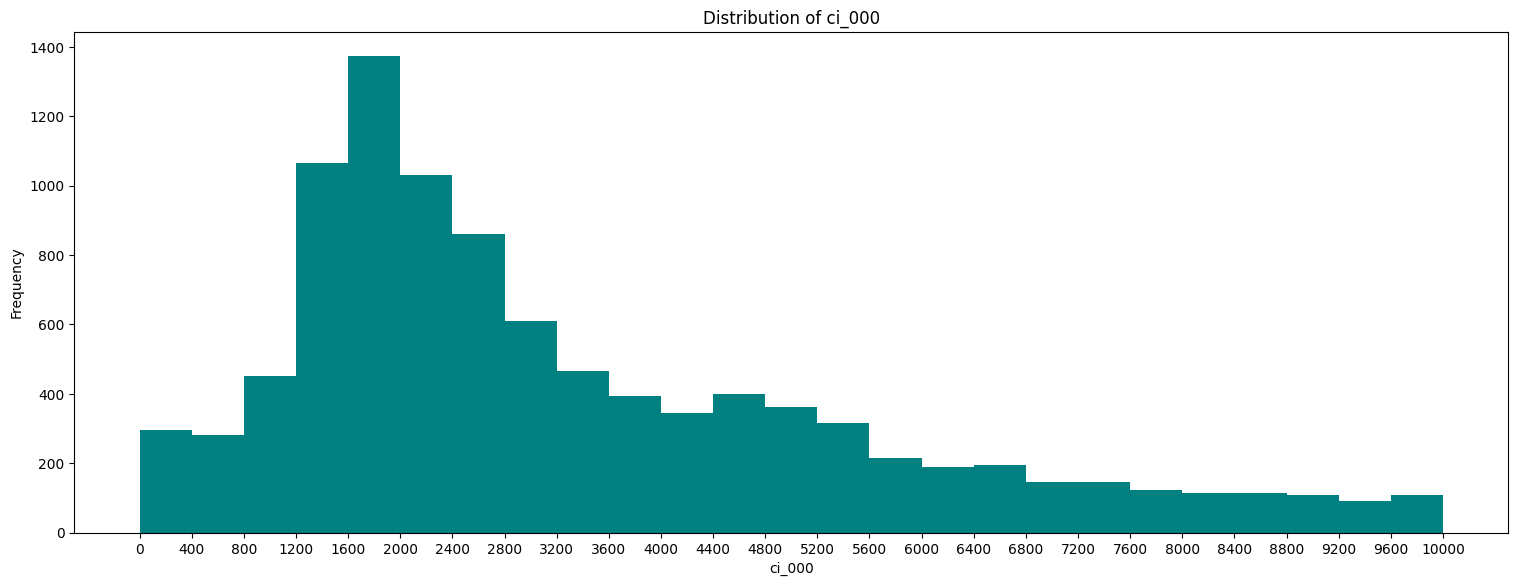

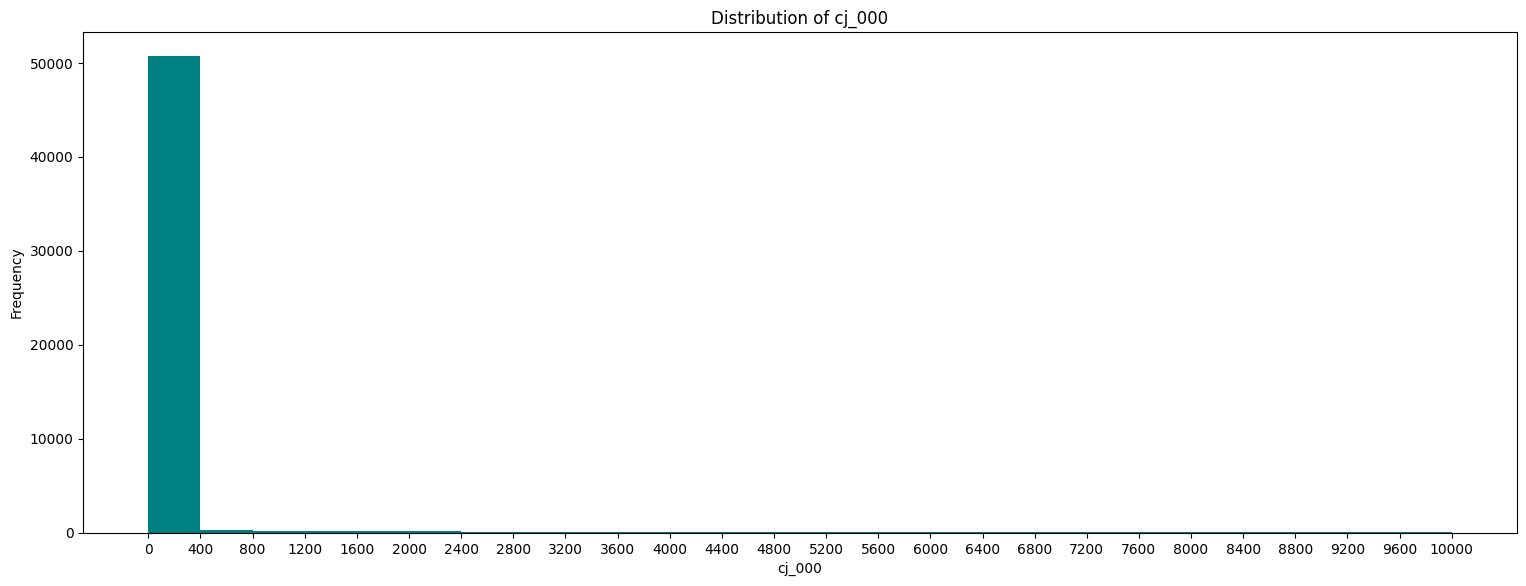

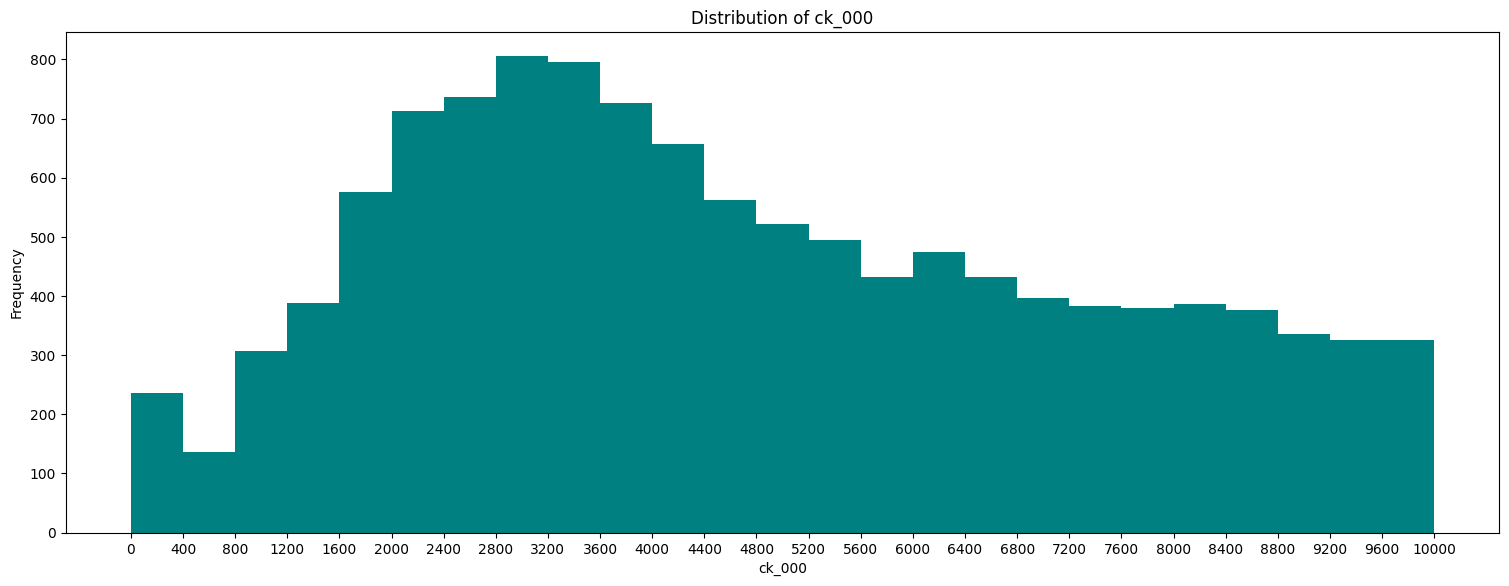

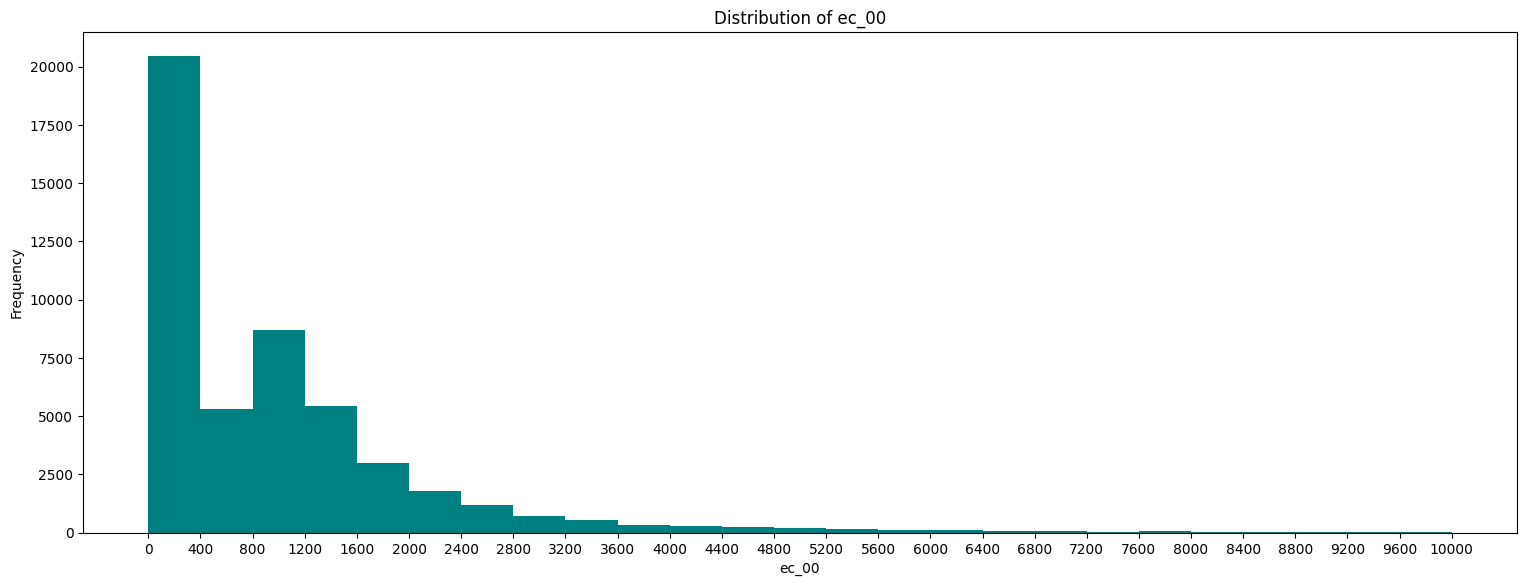

In [19]:
from matplotlib import pyplot
def vis_cluster(df, var):
    
    fig, ax = plt.subplots()
    fig = pyplot.gcf()
    fig.set_size_inches(18.5, 6.5)
    
    n_bins = 25
    max_range = 10000
    check_bin = max_range+n_bins
    check_bin2 = int(max_range/n_bins)
    
    ax.hist(df[[var]],bins=n_bins, range = (0, 10000), color = 'teal')
    ax.set_title(f'Distribution of {var}')
    ax.set_xticks(np.arange(0,check_bin,check_bin2))
    ax.set_ylabel(f"Frequency")
    ax.set_xlabel(var)

    return plt.show()
print(X[float_cols].skew(axis = 0, skipna = True))
for col in float_cols:
    vis_cluster(X, col)
    



A skewness value greater than 1 or less than -1 indicates a highly skewed distribution (right (positive) skewness or left (negative) skewness). A value between 0.5 and 1 or -0.5 and -1 is moderately skewed. A value between -0.5 and 0.5 indicates that the distribution is fairly symmetrical.

In [20]:
def vc(df, column, r=False):
    vc_df = df.reset_index().groupby([column]).size().to_frame('count')
    vc_df['percentage (%)'] = vc_df['count'].div(sum(vc_df['count'])).mul(100)
    vc_df = vc_df.sort_values(by=['percentage (%)'], ascending=False)
    print(f'STATUS: Value counts of "{column}"...')
    display(vc_df)
    if r:
        return vc_df

In [21]:
def extract_skewness(X):
    skewness = X.skew(axis = 0, skipna = True).values
    cols = X.skew(axis = 0, skipna = True).index
    skewdf = pd.DataFrame({'skew value':skewness}, index = cols)
    skewdf['left or right'] = np.nan
    skewdf['left or right'] = skewdf.apply(lambda x: 'left skewed' if x['skew value']>0.5 else x['left or right'], axis=1)
    skewdf['left or right'] = skewdf.apply(lambda x: 'right skewed' if x['skew value']<-0.5 else x['left or right'], axis=1)
    skewdf['left or right'] = skewdf.apply(lambda x: 'normal' if (x['skew value']<=0.5 and x['skew value']>=-0.5)  else x['left or right'], axis=1)
    return skewdf, vc(skewdf, 'left or right')
skewdf = extract_skewness(X)

STATUS: Value counts of "left or right"...


,count,percentage (%)
left or right,,
left skewed,162,99.386503
normal,1,0.613497


Only one column skewed in a normal way. Let's inspect it.

In [22]:
skewdf = skewdf[0]
normal_col = skewdf[skewdf['left or right'] =='normal'].index.values[0]
num_unique_normal_col = len(X[normal_col].dropna().unique())
print(f"Number of unique values in {normal_col} is {num_unique_normal_col}")
display(X[normal_col].head())

X = X.drop(normal_col, axis=1)
X_PREV = X.copy()

ORIGINAL_ARRANGEMENT = X.columns
extract_skewness(X)


Number of unique values in cd_000 is 1


0    1209600.0
1    1209600.0
2    1209600.0
3    1209600.0
4    1209600.0
Name: cd_000, dtype: float64

STATUS: Value counts of "left or right"...


,count,percentage (%)
left or right,,
left skewed,162,100.0


(        skew value left or right
 aa_000    6.115752   left skewed
 ac_000    1.784845   left skewed
 ad_000  212.459406   left skewed
 ae_000   90.588252   left skewed
 af_000   51.671770   left skewed
 ...            ...           ...
 ee_007   15.717250   left skewed
 ee_008   13.426265   left skewed
 ee_009   29.214135   left skewed
 ef_000   73.432440   left skewed
 eg_000   89.029482   left skewed
 
 [162 rows x 2 columns],
 None)

We separate some categorical-like columns with bins of unique values, and numerical columns. Then we imputate with mode/median depending on type.

In [23]:
uniq = X.nunique()
cut  = uniq.quantile(0.25)
cats = uniq[uniq < cut].index.tolist()
nums = [c for c in X.columns if c not in cats]

X_cat = X[cats].fillna(X[cats].mode().iloc[0]).astype('Int64')
X_num = X[nums].fillna(X[nums].median())


In [24]:
X_cat

,ad_000,ae_000,af_000,ag_000,ag_001,aj_000,ak_000,ar_000,as_000,au_000,...,dg_000,dh_000,dj_000,dk_000,dl_000,dm_000,dz_000,ea_000,ef_000,eg_000
0,280,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,68,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,100,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,66,0,10,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,32
4,458,0,0,0,0,226,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,186,0,0,0,0,280,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,224,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,18,0,0,0,0,0,0,0,0,0,...,7042,0,0,0,0,0,0,0,0,0
59998,494,0,0,0,0,0,0,0,0,0,...,0,190,0,0,0,0,0,0,0,0


In [25]:
X_num

,aa_000,ac_000,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,...,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009
0,76698,2.130706e+09,0.0,0.0,37250.0,1432864.0,3664156.0,1007684.0,25896.0,0.0,...,965866.0,1706908.0,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0
1,33058,0.000000e+00,0.0,0.0,18254.0,653294.0,1720800.0,516724.0,31642.0,0.0,...,664504.0,824154.0,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0
2,41040,2.280000e+02,0.0,0.0,1648.0,370592.0,1883374.0,292936.0,12016.0,0.0,...,262032.0,453378.0,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0
3,12,7.000000e+01,0.0,318.0,2212.0,3232.0,1872.0,0.0,0.0,0.0,...,5670.0,1566.0,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0
4,60874,1.368000e+03,0.0,0.0,43752.0,1966618.0,1800340.0,131646.0,4588.0,0.0,...,404740.0,904230.0,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,153002,6.640000e+02,0.0,2564.0,59100.0,1603216.0,6015982.0,1968266.0,164972.0,12560.0,...,1608808.0,1479066.0,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0
59996,2286,2.130707e+09,0.0,0.0,104.0,99186.0,36564.0,128.0,0.0,0.0,...,13934.0,15024.0,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0
59997,112,2.130706e+09,0.0,0.0,28.0,11592.0,11538.0,0.0,0.0,0.0,...,15876.0,2740.0,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0
59998,80292,2.130706e+09,0.0,0.0,330.0,202498.0,3251010.0,2061456.0,360436.0,59754.0,...,1180714.0,1709450.0,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0


In [26]:
X = pd.concat([X_num, X_cat], axis=1)

# I.III Feature Reduction

In [27]:
from datetime import datetime
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, StackingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score,roc_auc_score, make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.exceptions import ConvergenceWarning
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, _tree
from warnings import simplefilter
import warnings
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from IPython.display import display
from matplotlib import pyplot as plt
import matplotlib.style

# GLOBAL VARIABLES
RANDOM_NUMBER=42
TEST_SIZE_ASSIGNED = 0.20

In [28]:
def select_feature_dtc(X, Y):
    # get selector.threshold_
    selector = SelectFromModel(estimator=RandomForestClassifier(random_state=RANDOM_NUMBER)).fit(X, Y)
    print(f'selector.threshold_ = {selector.threshold_}')

    feature_name = X.columns[selector.get_support()]
    print(f'Number of selected features = {feature_name.shape[0]}')

    # put it into a data frame
    d = {'columns': X.columns.tolist(),  'support':selector.get_support()}
    df = pd.DataFrame(data=d)
    df = df[df.support ==True]
    df.reset_index(inplace = True, drop=True)
    print(f'Shape of Df = {df.shape}')
    return df, feature_name
best_feature,feature_name = select_feature_dtc(X, Y)
print(f"Selected Features: {feature_name}")
X_dim = X[feature_name]
print("Reduced Dimension")
X_dim

selector.threshold_ = 0.006172839506172839
Number of selected features = 46
Shape of Df = (46, 2)
Selected Features: Index(['aa_000', 'ag_002', 'ag_003', 'ag_006', 'ah_000', 'ai_000', 'al_000',
       'am_0', 'an_000', 'ap_000', 'aq_000', 'ay_005', 'ay_006', 'ay_007',
       'ay_008', 'az_001', 'ba_005', 'bb_000', 'bg_000', 'bh_000', 'bi_000',
       'bj_000', 'bk_000', 'bt_000', 'bu_000', 'bv_000', 'bx_000', 'by_000',
       'cc_000', 'ci_000', 'ck_000', 'cn_001', 'cn_002', 'cn_004', 'cq_000',
       'cs_002', 'cs_004', 'dn_000', 'ee_000', 'ee_002', 'ee_004', 'ee_005',
       'ee_007', 'ag_001', 'ay_009', 'cn_000'],
      dtype='object')
Reduced Dimension


,aa_000,ag_002,ag_003,ag_006,ah_000,ai_000,al_000,am_0,an_000,ap_000,...,cs_004,dn_000,ee_000,ee_002,ee_004,ee_005,ee_007,ag_001,ay_009,cn_000
0,76698,0.0,0.0,3664156.0,2551696.0,0.0,0.0,0.0,4933296.0,1766008.0,...,428776.0,62282.0,965866.0,1240520.0,721044.0,469792.0,157956.0,0,0,0
1,33058,0.0,0.0,1720800.0,1393352.0,0.0,0.0,0.0,2560898.0,1084598.0,...,272956.0,33736.0,664504.0,421400.0,293306.0,245416.0,81140.0,0,0,0
2,41040,0.0,0.0,1883374.0,1234132.0,0.0,0.0,0.0,2371990.0,300796.0,...,100326.0,13876.0,262032.0,277378.0,423992.0,409564.0,158022.0,0,0,0
3,12,0.0,318.0,1872.0,2668.0,0.0,642.0,3894.0,10184.0,10764.0,...,692.0,232.0,5670.0,240.0,58.0,44.0,0.0,0,0,0
4,60874,0.0,0.0,1800340.0,1974038.0,0.0,0.0,0.0,3230626.0,1058136.0,...,186242.0,44946.0,404740.0,622012.0,405298.0,347188.0,311560.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,153002,0.0,2564.0,6015982.0,4880368.0,0.0,1224.0,2114.0,8913782.0,1929126.0,...,425276.0,62846.0,1608808.0,998500.0,1290398.0,1218244.0,717762.0,0,0,0
59996,2286,0.0,0.0,36564.0,56982.0,0.0,0.0,0.0,123604.0,24020.0,...,2112.0,1066.0,13934.0,10578.0,21126.0,68424.0,0.0,0,0,0
59997,112,0.0,0.0,11538.0,8784.0,0.0,0.0,0.0,29698.0,13970.0,...,5348.0,622.0,15876.0,792.0,452.0,144.0,2622.0,0,0,0
59998,80292,0.0,0.0,3251010.0,2634394.0,0.0,0.0,0.0,4543410.0,1615634.0,...,388092.0,79230.0,1180714.0,699352.0,347378.0,225724.0,165070.0,0,0,0


# I.IV Scaling & Stratified Split

In [29]:
from sklearn.model_selection import train_test_split

RANDOM_STATE = 42
target = "class"

X_train, X_val, y_train, y_val = train_test_split(
    X_dim, Y,
    test_size=0.2,
    stratify=Y,
    random_state=RANDOM_STATE
)

print(f"Train shape: {X_train.shape}, Validation shape: {X_val.shape}")
print(f"Class ratio (train): {y_train.mean():.4f}, (val): {y_val.mean():.4f}")

Train shape: (48000, 46), Validation shape: (12000, 46)
Class ratio (train): 0.0167, (val): 0.0167


# II.I Baseline Models

We’ll test **Logistic Regression, Random Forest, and LightGBM**, all run fast. 

Then we evaluate ROC-AUC and Expected cost.

We search for thresholds to minimize cost; also doing a 5-fold stratified CV Cost.

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report
import numpy as np, pandas as pd

def evaluate_model(model, X_tr, y_tr, X_val, y_val, name="Model", cost_fp=10, cost_fn=500):
    y_proba = model.predict_proba(X_val)[:, 1]
    y_pred  = (y_proba >= 0.5).astype(int)
    auc = roc_auc_score(y_val, y_proba)
    tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()
    total_cost = fp*cost_fp + fn*cost_fn
    print(f"\n {name} ")
    print(f"AUC: {auc:.3f}")
    print(f"FP={fp}, FN={fn}, Cost={total_cost}")
    print(classification_report(y_val, y_pred, digits=3))
    return dict(model=name, auc=auc, cost=total_cost, fp=fp, fn=fn)

results = []

In [31]:
logreg = LogisticRegression(max_iter=500, random_state=RANDOM_STATE)
logreg.fit(X_train, y_train)
results.append(evaluate_model(logreg, X_train, y_train, X_val, y_val, "Logistic Regression"))


 Logistic Regression 
AUC: 0.846
FP=136, FN=93, Cost=47860
              precision    recall  f1-score   support

           0      0.992     0.988     0.990     11800
           1      0.440     0.535     0.483       200

    accuracy                          0.981     12000
   macro avg      0.716     0.762     0.737     12000
weighted avg      0.983     0.981     0.982     12000



In [32]:
rf = RandomForestClassifier(n_estimators=200, max_depth=8, random_state=RANDOM_STATE, n_jobs=-1)
rf.fit(X_train, y_train)
results.append(evaluate_model(rf, X_train, y_train, X_val, y_val, "Random Forest"))


 Random Forest 
AUC: 0.992
FP=17, FN=78, Cost=39170
              precision    recall  f1-score   support

           0      0.993     0.999     0.996     11800
           1      0.878     0.610     0.720       200

    accuracy                          0.992     12000
   macro avg      0.936     0.804     0.858     12000
weighted avg      0.991     0.992     0.991     12000



In [33]:
lgbm = LGBMClassifier(n_estimators=300, learning_rate=0.05, max_depth=8, random_state=RANDOM_STATE)
lgbm.fit(X_train, y_train)
results.append(evaluate_model(lgbm, X_train, y_train, X_val, y_val, "LightGBM"))

[LightGBM] [Info] Number of positive: 800, number of negative: 47200
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003101 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11565
[LightGBM] [Info] Number of data points in the train set: 48000, number of used features: 46
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.016667 -> initscore=-4.077537
[LightGBM] [Info] Start training from score -4.077537
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

In [34]:
pd.DataFrame(results)

,model,auc,cost,fp,fn
0,Logistic Regression,0.846476,47860,136,93
1,Random Forest,0.991797,39170,17,78
2,LightGBM,0.990155,25690,19,51


The LightGBM performs best among parametric models tested.

**Why?**

- When we have Tabular + sparse & skewed features, tree ensembles like LightGBM shine. They are non-linear, robust to scale, handle wide ranges and monotonic relations. 

- Our feature filtering reduced noise; ensembles still model complex boundaries.

***Note***: The LightGBM “no further splits” warnings are common under extreme class skew and conservative split constraints. We can ease constraints later: min_data_in_leaf, num_leaves, feature_fraction


# II.II Cost-Tuned Threshold

Now we sweep the threshold to find the minimum-cost operating point.

In [35]:
from sklearn.metrics import roc_curve

def tune_threshold(model, X_val, y_val, cost_fp=10, cost_fn=500):
    prob = model.predict_proba(X_val)[:, 1]
    fpr, tpr, thr = roc_curve(y_val, prob)
    # cost = FP*cost_fp + FN*cost_fn
    fp = fpr * (1 - y_val.mean()) * len(y_val)
    fn = (1 - tpr) * y_val.mean() * len(y_val)
    costs = fp*cost_fp + fn*cost_fn
    best_idx = np.argmin(costs)
    best_thr = thr[best_idx]
    print(f"Best threshold: {best_thr:.3f}, Expected cost: {costs[best_idx]:.1f}")
    return best_thr, pd.DataFrame({"threshold": thr, "cost": costs})

In [37]:
best_thr_lr, cost_lr = tune_threshold(logreg, X_val, y_val)
best_thr_rf, cost_rf = tune_threshold(rf, X_val, y_val)
best_thr_lgbm, cost_lgbm = tune_threshold(lgbm, X_val, y_val)


Best threshold: 0.081, Expected cost: 33280.0
Best threshold: 0.025, Expected cost: 7950.0
Best threshold: 0.004, Expected cost: 5570.0


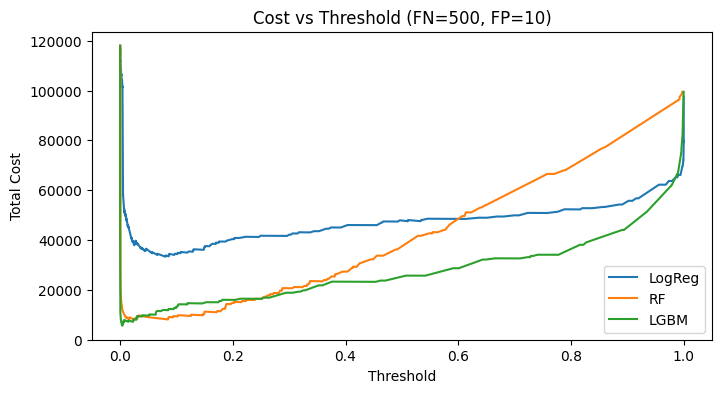

In [38]:
# Compare visually
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.plot(cost_lr["threshold"], cost_lr["cost"], label="LogReg")
plt.plot(cost_rf["threshold"], cost_rf["cost"], label="RF")
plt.plot(cost_lgbm["threshold"], cost_lgbm["cost"], label="LGBM")
plt.xlabel("Threshold")
plt.ylabel("Total Cost")
plt.legend()
plt.title("Cost vs Threshold (FN=500, FP=10)")
plt.show()


In [39]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, roc_curve

def cv_cost(
    model, X, y, *,
    cost_fp=10, cost_fn=500, folds=5, random_state=42,
    sampler=None,        # pass e.g. SMOTE(sampling_strategy=0.1, random_state=42)
    verbose=True
):
    y = np.asarray(y).ravel()
    skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=random_state)

    aucs, best_costs, best_thresholds = [], [], []

    for tr_idx, va_idx in skf.split(X, y):
        X_tr, X_va = X.iloc[tr_idx], X.iloc[va_idx]
        y_tr, y_va = y[tr_idx], y[va_idx]

        # optional resampling in-train only
        if sampler is not None:
            X_tr, y_tr = sampler.fit_resample(X_tr, y_tr)

        model.fit(X_tr, y_tr)
        prob = model.predict_proba(X_va)[:, 1]

        aucs.append(roc_auc_score(y_va, prob))

        fpr, tpr, thr = roc_curve(y_va, prob)
        P = (y_va == 1).sum()
        N = (y_va == 0).sum()
        FP = fpr * N
        FN = (1 - tpr) * P
        costs = cost_fp * FP + cost_fn * FN

        best_idx = np.argmin(costs)
        best_costs.append(costs[best_idx])
        best_thresholds.append(thr[best_idx])

    if verbose:
        print(f"Mean AUC = {np.mean(aucs):.3f} ± {np.std(aucs):.3f}")
        print(f"Mean Cost = {np.mean(best_costs):.1f} ± {np.std(best_costs):.1f}")
        print(f"Best thresholds per fold: {[round(t, 4) for t in best_thresholds]}")

    return {
        "aucs": aucs,
        "best_costs": best_costs,
        "best_thresholds": best_thresholds,
        "mean_auc": float(np.mean(aucs)),
        "mean_cost": float(np.mean(best_costs)),
    }


In [40]:
_ = cv_cost(lgbm, X_dim, Y, cost_fp=10, cost_fn=500, folds=5)


[LightGBM] [Info] Number of positive: 800, number of negative: 47200
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002818 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11564
[LightGBM] [Info] Number of data points in the train set: 48000, number of used features: 46
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.016667 -> initscore=-4.077537
[LightGBM] [Info] Start training from score -4.077537
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

- **Cost-sensitive decision thresholding** aligns model usage with business risk: heavy FN penalty pushes threshold down.
- **Stable CV shows generalization:** small variance in AUC and cost across folds.

# III Addressing Label Imbalance

The models (especially tree ensembles) already handle imbalance decently, but class imbalance still affects:

- how the model learns decision boundaries,

- how it estimates probabilities, and

- how stable cross-validation thresholds are.


### III.I Weighted Learning

In [41]:
logreg_weighted = LogisticRegression(class_weight={0:1, 1:59}, max_iter=500, solver='lbfgs')
rf_weighted     = RandomForestClassifier(class_weight={0:1, 1:59}, n_estimators=300, random_state=42)

In [ ]:
_ = cv_cost(logreg, X_dim, Y, cost_fp=10, cost_fn=500)

Mean AUC = 0.841 ± 0.016
Mean Cost = 33674.0 ± 3264.3
Best thresholds per fold: [0.0712, 0.0689, 0.0574, 0.0974, 0.0632]


Linear model underfits in this highly skewed dataset.

In [ ]:
_ = cv_cost(logreg_weighted, X_dim, Y, cost_fp=10, cost_fn=500)


Mean AUC = 0.962 ± 0.008
Mean Cost = 13128.0 ± 1430.8
Best thresholds per fold: [0.5673, 0.5872, 0.4299, 0.5231, 0.5736]


Reweighting fixed class prior mismatch and improved separation.

In [ ]:
_ = cv_cost(rf, X_dim, Y, cost_fp=10, cost_fn=500)

Mean AUC = 0.987 ± 0.005
Mean Cost = 8826.0 ± 1282.3
Best thresholds per fold: [0.0199, 0.0303, 0.0214, 0.0207, 0.0651]


Already very strong.

In [ ]:
_ = cv_cost(rf_weighted, X_dim, Y, cost_fp=10, cost_fn=500)

KeyboardInterrupt: 

Small cost win (~12% better), big runtime hit.

In [42]:
from lightgbm import LGBMClassifier

# weight = N_neg / N_pos ≈ 59 
lgbm_weighted = LGBMClassifier(
    n_estimators=600,
    learning_rate=0.03,
    num_leaves=64,
    subsample=0.8,
    colsample_bytree=0.8,
    min_data_in_leaf=50,
    scale_pos_weight=59,     # try 20–40 grid if you like
    random_state=RANDOM_NUMBER,
    n_jobs=-1
)

In [43]:
_ = cv_cost(lgbm_weighted, X_dim, Y, cost_fp=10, cost_fn=500)


[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Info] Number of positive: 800, number of negative: 47200
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003014 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11564
[LightGBM] [Info] Number of data points in the train set: 48000, number of used features: 46
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.016667 -> initscore=-4.077537
[LightGBM] [Info] Start training from score -4.077537
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning

Slightly worse cost than just using cost-tuned thresholds. It seems that for tree ensembles, moderate weighting or even no weighting + cost-tuned threshold often suffices.

### III.II Sampling Approaches

In [45]:
import sklearn, imblearn
print("scikit-learn:", sklearn.__version__)
print("imbalanced-learn:", imblearn.__version__)


scikit-learn: 1.4.2
imbalanced-learn: 0.12.3


If we find true categoricals -> SMOTE-NC gets categorical indices and continuous features.

If not → we automatically switch to standard SMOTE on float64 arrays, so there’s no attempt to cast synthetic floats back to int64.

In [66]:
from imblearn.over_sampling import SMOTENC, SMOTE

def make_sampler(X_dim, pos_ratio=0.10, random_state=RANDOM_NUMBER):
    return SMOTE(
            sampling_strategy=pos_ratio,
            random_state=random_state,
            k_neighbors=5,
        )

In [67]:
sampler = make_sampler(X_dim, pos_ratio=0.10, random_state=RANDOM_NUMBER)

In [ ]:
cat_cols = []
for c in X_dim.columns:
    vals = X_dim[c].dropna().unique()
    if len(vals) <= 5 or set(vals).issubset({0, 1}):
        cat_cols.append(c)

cat_idx = [X_dim.columns.get_loc(c) for c in cat_cols]

# 2) Ensure numeric dtypes without Pandas "Int64" (nullable)
#    -> use standard numpy dtypes: int64 for categoricals, float64 for continuous
cont_cols = [c for c in X_dim.columns if c not in cat_cols]

X_dim_fixed = X_dim.copy()
# Avoid pandas *nullable* integer dtypes; use numpy dtypes
X_dim_fixed[cont_cols] = X_dim_fixed[cont_cols].astype('float64')
if len(cat_cols) > 0:
    X_dim_fixed[cat_cols]  = X_dim_fixed[cat_cols].astype('int64')

# Ensure y is standard int
Y_fixed = pd.Series(np.asarray(Y).ravel(), name='target').astype('int64')


In [ ]:
_ = cv_cost(lgbm,X_dim_fixed, Y_fixed, sampler=sampler, cost_fp=10, cost_fn=500, folds=5, random_state=RANDOM_NUMBER)

[LightGBM] [Info] Number of positive: 4720, number of negative: 47200
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004994 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11730
[LightGBM] [Info] Number of data points in the train set: 51920, number of used features: 46
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.090909 -> initscore=-2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Number of positive: 4720, number of negative: 47200
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003517 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11730
[LightGBM] [Info] Number of data points in the train set: 51920, number of used features: 46
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.090909 -> initscore=-2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [

In [76]:
# Inspect how many positives per fold to keep k_neighbors safe (>= k+1)
# (With ~800 pos overall, ~160 per fold; k=5 is fine.)
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for _, va_idx in skf.split(X_dim_fixed, Y_fixed):
    print("Positives in fold:", int(Y_fixed.iloc[va_idx].sum()))


Positives in fold: 200
Positives in fold: 200
Positives in fold: 200
Positives in fold: 200
Positives in fold: 200


# IV.I Root Cause Analysis & Explainability